# Marvel Social Network Analysis

In [7]:
import numpy as np
import pandas as pd

In [63]:
heros = pd.read_csv("data/edges.csv")  # hero, comic
hero_edges = pd.read_csv("data/hero-network.csv")  # hero 1, hero 2

In [64]:
heros.head(3)

,hero,comic
0,24-HOUR MAN/EMMANUEL,AA2 35
1,3-D MAN/CHARLES CHAN,AVF 4
2,3-D MAN/CHARLES CHAN,AVF 5


In [100]:
hero_edges.head(3)

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA


### Making a weighted graph  
We will process the heros data set to give weights to the nodes, for the number of comics that each character appears in.   
  
We can also use this same data set to see how often characters cross paths, providing edge weights

### Deduplicate edges to generate weights  
Below, I loop through each row of the "hero_edges" data frame, where each row represents a a co-appearance of two comic book characters. With this, we can count the number of times that each character appears (node weights) and the number of times that each hero pair appears (edge weights).

In [ ]:
from collections import defaultdict

In [116]:
edge_weights = defaultdict(int)
node_weights = defaultdict(int)

i=0
for row in hero_edges.itertuples():
    
    # grab the two heros names and remove commas, white space
    h1, h2 = row[1].replace(",", "").strip(), row[2].replace(",", "").strip() 
    
    # handle edges that contain self references
    if h1 != h2:
        # update node weights for individual hero appearance counts
        node_weights[h1] += 1
        node_weights[h2] += 1


        # update edge weights for hero co-appearence
        hero_list = [h1, h2]  # put the heros in a list
        hero_list.sort()  # sort the list for naming consistency
        hero_tup = (hero_list[0], hero_list[1])  # use as a key
        edge_weights[hero_tup] += 1  # increment co-appearence count

### Weighted edges  to csv
Hero 1, hero 2, number of co-occurrences

In [117]:
len(edge_weights.keys())

167100

In [118]:
edges = zip(edge_weights.keys(), edge_weights.values())

In [119]:
weighted_edge_csv = "hero1,hero2,weight\n"
for e in edges:
    weighted_edge_csv += ",".join([e[0][0], e[0][1], str(e[1])]) + "\n"

In [120]:
f = open("weighted_edges.csv", "wb")
f.write(weighted_edge_csv)
f.close()

### Weighted nodes  to csv
Hero, number of occurrences

In [121]:
len(node_weights.keys())

6421

In [122]:
nodes = zip(node_weights.keys(), node_weights.values())

In [123]:
weighted_node_csv = "hero,weight\n"
for n in nodes:
    weighted_node_csv += ",".join([n[0], str(n[1])]) + "\n"

In [124]:
g = open("weighted_nodes.csv", "wb")
g.write(weighted_node_csv)
g.close()

### Create data frames of the weighted nodes and edges

In [125]:
node_df = pd.read_csv("weighted_nodes.csv")
edge_df = pd.read_csv("weighted_edges.csv")

In [140]:
node_df.sort_values("weight", ascending = 0).head(15)

,hero,weight
4394,CAPTAIN AMERICA,16259
4717,SPIDER-MAN/PETER PAR,13717
6394,IRON MAN/TONY STARK,11817
4407,THOR/DR. DONALD BLAK,11427
2571,THING/BENJAMIN J. GR,10681
185,WOLVERINE/LOGAN,10353
5341,HUMAN TORCH/JOHNNY S,10237
5773,SCARLET WITCH/WANDA,9911
1704,MR. FANTASTIC/REED R,9775
4318,VISION,9696


In [141]:
edge_df.sort_values("weight", ascending = 0).head(15)

,hero1,hero2,weight
57190,MISS AMERICA/MADELIN,PATRIOT/JEFF MACE,1894
134528,HUMAN TORCH/JOHNNY S,THING/BENJAMIN J. GR,744
8026,HUMAN TORCH/JOHNNY S,MR. FANTASTIC/REED R,713
141326,MR. FANTASTIC/REED R,THING/BENJAMIN J. GR,708
59245,INVISIBLE WOMAN/SUE,MR. FANTASTIC/REED R,701
64210,HUMAN TORCH/JOHNNY S,INVISIBLE WOMAN/SUE,694
31411,INVISIBLE WOMAN/SUE,THING/BENJAMIN J. GR,668
8427,SPIDER-MAN/PETER PAR,WATSON-PARKER MARY,616
13898,JAMESON J. JONAH,SPIDER-MAN/PETER PAR,526
136905,CAPTAIN AMERICA,IRON MAN/TONY STARK,446


### Shrink the network to top 1000 common characters

In [143]:
top_1000_characters = node_df.sort_values("weight", ascending = 0).head(1000)

In [148]:
top_1000_characters.to_csv(path_or_buf="weighted_nodes_top_1000.csv", sep=',')

In [144]:
popular_edges = edge_df.loc[edge_df.hero1.isin(top_1000_characters.hero) & \
                            edge_df.hero2.isin(top_1000_characters.hero)]

In [145]:
popular_edges.shape

(67461, 3)

In [147]:
popular_edges.to_csv(path_or_buf="weighted_edge_top_1000.csv", sep=',')

### Put this all into a network x graph object

In [149]:
import matplotlib.pyplot as plt
import networkx as nx
% matplotlib inline

In [133]:
G = nx.Graph()

# add all super heros and their connections to the graph
for row in edge_df.itertuples():
    G.add_edge(row[1], row[2], weight=row[3])
    

In [134]:
nx_edges = [(u, v) for (u, v, d) in G.edges(data=True)]
nx_weights = [d["weight"] for (u, v, d) in G.edges(data=True)]

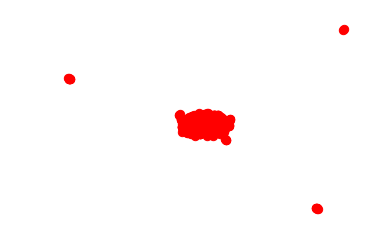

In [137]:
pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=70)

# edges
nx.draw_networkx_edges(G, pos, edgelist=nx_edges,
                       width=0.7)

# labels
# nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()

In [ ]:
## raw code from the docs
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.5]

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge,
                       width=6)
nx.draw_networkx_edges(G, pos, edgelist=esmall,
                       width=6, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()